In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
x = torch.tensor([[0.,0.],[0.,1.], [1.,0.], [1.,1.]])
y = torch.tensor([0.,1.,1.,0.]).view(-1,1)

In [3]:
y

tensor([[0.],
        [1.],
        [1.],
        [0.]])

In [4]:
class XOR_net(nn.Module):
  def __init__(self):
    super(XOR_net, self).__init__()
    self.layer1 = nn.Sequential(
        nn.Linear(2,1),
        nn.Sigmoid()
    )
    self.layer2 = nn.Sequential(
        nn.Linear(2,3),
        nn.Sigmoid(),
        nn.Linear(3,1),
        nn.Sigmoid()
    )

  def forward(self, input, num_layer):
    if num_layer == 1:
      out = self.layer1(input)
    elif num_layer == 2:
      out = self.layer2(input)
    else:
      print("out of range")
      raise
    return out

In [5]:
net = XOR_net()

In [6]:
print(net)

XOR_net(
  (layer1): Sequential(
    (0): Linear(in_features=2, out_features=1, bias=True)
    (1): Sigmoid()
  )
  (layer2): Sequential(
    (0): Linear(in_features=2, out_features=3, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=3, out_features=1, bias=True)
    (3): Sigmoid()
  )
)


In [7]:
learning_rate = 0.05
epochs = 10000

In [8]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(net.parameters(), lr = learning_rate)

In [9]:
error1, error2 = [], []

for epoch in range(epochs):
  for i, (input, ans) in enumerate(zip(x,y)):
    output1 = net(input,1)
    output2 = net(input,2)

    loss1 = criterion(output1, ans)
    loss2 = criterion(output2, ans)

    optimizer.zero_grad()
    loss1.backward()
    loss2.backward()
    optimizer.step()

    error1.append(loss1.detach().numpy())
    error2.append(loss2.detach().numpy())

  if epoch % 500 == 0 or (epoch+1)==epochs:
    print('Epoch [{}/{}] Loss1: {:.4f} Loss2: {:.4f}'.format(epoch+1, epochs, loss1, loss2))

Epoch [1/10000] Loss1: 0.8075 Loss2: 0.8404
Epoch [501/10000] Loss1: 0.7069 Loss2: 0.6941
Epoch [1001/10000] Loss1: 0.7059 Loss2: 0.6314
Epoch [1501/10000] Loss1: 0.7059 Loss2: 0.3734
Epoch [2001/10000] Loss1: 0.7059 Loss2: 0.1126
Epoch [2501/10000] Loss1: 0.7059 Loss2: 0.0521
Epoch [3001/10000] Loss1: 0.7059 Loss2: 0.0318
Epoch [3501/10000] Loss1: 0.7059 Loss2: 0.0223
Epoch [4001/10000] Loss1: 0.7059 Loss2: 0.0170
Epoch [4501/10000] Loss1: 0.7059 Loss2: 0.0136
Epoch [5001/10000] Loss1: 0.7059 Loss2: 0.0113
Epoch [5501/10000] Loss1: 0.7059 Loss2: 0.0096
Epoch [6001/10000] Loss1: 0.7059 Loss2: 0.0084
Epoch [6501/10000] Loss1: 0.7059 Loss2: 0.0074
Epoch [7001/10000] Loss1: 0.7059 Loss2: 0.0066
Epoch [7501/10000] Loss1: 0.7059 Loss2: 0.0060
Epoch [8001/10000] Loss1: 0.7059 Loss2: 0.0055
Epoch [8501/10000] Loss1: 0.7059 Loss2: 0.0050
Epoch [9001/10000] Loss1: 0.7059 Loss2: 0.0047
Epoch [9501/10000] Loss1: 0.7059 Loss2: 0.0043
Epoch [10000/10000] Loss1: 0.7059 Loss2: 0.0040


In [10]:
# Test after train
for input, target in zip (x, y):
  output1 = net(input,1)
  output2 = net(input,2)
  print("input: ",input, "layer1: ", output1.data, "\tlayer2: ", output2.data, "\tanswer:", target)

input:  tensor([0., 0.]) layer1:  tensor([0.5063]) 	layer2:  tensor([0.0051]) 	answer: tensor([0.])
input:  tensor([0., 1.]) layer1:  tensor([0.5000]) 	layer2:  tensor([0.9953]) 	answer: tensor([1.])
input:  tensor([1., 0.]) layer1:  tensor([0.4937]) 	layer2:  tensor([0.9947]) 	answer: tensor([1.])
input:  tensor([1., 1.]) layer1:  tensor([0.4873]) 	layer2:  tensor([0.0040]) 	answer: tensor([0.])


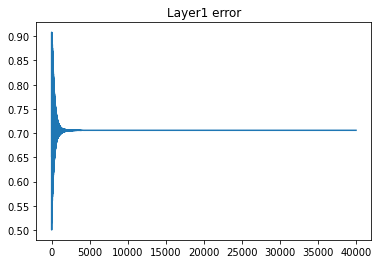

In [11]:
plt.plot(error1)
plt.title("Layer1 error")
plt.show()

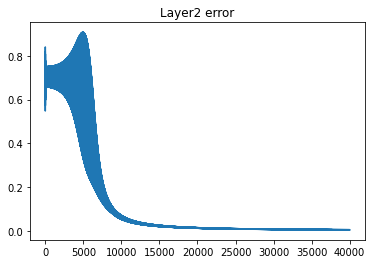

In [12]:
plt.plot(error2)
plt.title("Layer2 error")
plt.show()